In [186]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [187]:
df = pd.read_csv('../data/nutritional_values.csv')
recetas = pd.read_csv('../data/output.csv',sep='|')
ing = pd.read_csv('../data/ingredients_100.csv')
ing_raw = pd.read_csv('../data/ingredientes.csv',sep='|')

In [175]:
df['Total_Grams'].describe()

count      7193.000000
mean       3886.029994
std       18748.642579
min           0.000000
25%         498.000000
50%         900.000000
75%        1549.310000
max      750501.000000
Name: Total_Grams, dtype: float64

In [194]:
df.sort_values(['Total_Grams'], ascending=False)[:30]

,Recipe_id,alcohol (etanol),"energía, total","grasa, total (lipidos totales)","proteina, total",agua (humedad),"fibra, dietetica total",carbohidratos,ácido graso 22:6 n-3 (ácido docosahexaenóico),"ácidos grasos, monoinsaturados totales",...,calcio,"hierro, total",potasio,magnesio,sodio,fósforo,ioduro,"selenio, total",zinc (cinc),Total_Grams
2785,38438,68250.000000,525182.320000,2.521000,1503.604000,669448.170000,11.262000,11285.424000,0.000000,0.322900,...,75.127660,6.004143,360.950730,45.060900,30.010050,52.631760,0.000115,0.000000,0.000511,750501.00000
3402,50611,0.085800,290983.316754,9754.887120,64410.986625,534466.494000,5.761000,313.705000,1247.200000,1484.626192,...,451.763124,144.075390,1886.408300,306.452073,339.787790,784.450320,0.960583,0.146741,7.831736,602295.83522
113,7124,18.331260,111888.811325,468.218441,3359.480993,121787.910143,2564.092062,22928.433404,0.000000,82.726845,...,17.973197,1.056600,789.143304,30.180541,27.034338,70.299350,0.004060,0.002298,0.458123,151294.92158
3767,51884,0.000000,88892.769812,303.207358,933.822302,125402.090643,3459.008377,20155.343019,0.000000,105.257967,...,30.753508,1.803856,226.790276,13.611577,3.273669,33.616863,0.000126,0.000916,0.152757,151003.47170
1429,23812,0.000000,72455.357237,148.129897,565.729698,118270.715286,2881.098036,16893.799454,0.000000,224.849368,...,11.158545,0.878331,177.907398,8.895106,3.008487,18.728809,0.000014,0.000151,0.223279,139410.13060
2992,43076,0.000000,73663.000000,243.290000,2252.125000,81173.360000,1705.400000,15215.900000,0.000000,15.483000,...,11.298500,0.708220,525.993000,20.059400,15.555000,46.879000,0.002705,0.001547,0.305850,100690.00000
1709,27014,0.000000,180037.089631,8157.217372,26336.218223,64710.065661,14.862000,34.283548,0.000000,3363.962953,...,5.637174,0.654843,332.602875,33.855254,394.075134,265.816847,0.008003,0.059537,0.473651,100630.06174
2548,34297,0.000000,74686.362948,332.335233,2215.662946,80676.923897,1705.226527,15309.557927,0.000000,93.967325,...,11.040118,0.702357,525.601117,20.072039,19.719156,46.193200,0.002723,0.001509,0.300904,100358.35413
3395,50587,0.000000,73510.824000,255.484200,2203.465300,80642.423900,1700.470000,15200.921500,0.000000,15.966900,...,11.052902,0.701265,525.075404,20.010640,15.838757,46.038058,0.002606,0.001501,0.300293,100103.10000
494,10839,0.000000,19402.849625,142.398005,900.989267,93935.384840,1102.999979,3505.489818,0.000000,32.749678,...,11.098967,0.504630,236.161924,10.046379,21.662070,22.022449,0.002257,0.000990,0.200171,100095.91013


In [200]:
ing.sort_values(['Total_Grams'], ascending=False)[:30]

,Recipe_id,Ingrediente,Cantidad,Unidad,Indice,Grams,Total_Grams,Num_comensales
39121,38438,cava,750.0,botella,780,1000.0000,750000.0000,1.0
6996,50611,almeja,600.0,kg,273,1000.0000,600000.0000,1.0
30238,7124,patata,750.0,unidad,643,200.0000,150000.0000,1.0
38235,51884,mango,500.0,unidad,702,300.0000,150000.0000,1.0
40128,23812,manzana,700.0,unidad,703,160.0000,112000.0000,1.0
21273,43076,patata,500.0,unidad,643,200.0000,100000.0000,1.0
49990,34297,patata,500.0,unidad,643,200.0000,100000.0000,1.0
49132,50587,patata,500.0,unidad,643,200.0000,100000.0000,1.0
51482,10839,tomate,400.0,kg,667,1000.0000,100000.0000,4.0
18893,27014,atún,300.0,lata,282,330.0000,99000.0000,1.0


In [137]:
print(recetas[recetas['Id']==23115]['Ingredientes'])

8102    400 gr de pechuga de pollo,1 pimiento verde o ...
Name: Ingredientes, dtype: object


In [140]:
ing[ing['Recipe_id']==7167]

,Recipe_id,Ingrediente,Cantidad,Unidad,Indice,Grams,Total_Grams,Num_comensales
7702,7167,arroz,500.0,tazas,428,150.0,75000.0,1.0
7703,7167,cebolla,1.0,unidad,610,100.0,100.0,1.0
7704,7167,ajo,2.0,dientes,587,3.0,6.0,1.0
7705,7167,laurel,3.0,hojas,885,4.0,15.0,1.0
7706,7167,jamón cocido,200.0,gr,202,1.0,200.0,1.0
7707,7167,queso,300.0,gr,77,1.0,300.0,1.0
7708,7167,tomate,500.0,unidad,667,150.0,75000.0,1.0
7709,7167,pimienta,NaN,None,901,2.0,2.0,1.0
7710,7167,perejil,NaN,None,899,32.0,42.0,1.0
7711,7167,aceite de oliva,NaN,None,410,42.0,60.0,1.0


In [115]:
macros = df[['energía, total',
       'grasa, total (lipidos totales)', 'proteina, total',
       'fibra, dietetica total', 'carbohidratos']].copy()
macros.head()

,"energía, total","grasa, total (lipidos totales)","proteina, total","fibra, dietetica total",carbohidratos
0,0.00,0.0000,0.0000,0.000,0.0000
1,177.45,4.6032,10.2882,2.692,22.8661
2,44.95,0.3741,2.3100,4.227,7.9070
3,387.10,1.6820,10.5550,8.750,81.0050
4,1642.66,152.6620,12.2830,5.408,58.0880


In [125]:
clusters = 4

pipe = Pipeline([('scaler', StandardScaler()),('cluster',cluster.KMeans(n_clusters=clusters))])
macros['cluster'] = pipe.fit_predict(macros)

In [126]:
def print_cluster_stats(df, clusters):
    print('Items per cluster: ')
    items_cluster = [len(df[df['cluster']==cluster]) for cluster in range(clusters)]
    print(items_cluster)

In [127]:
print_cluster_stats(macros, clusters)

Items per cluster: 
[7094, 64, 2, 33]


In [129]:
macros[macros['cluster']==2]

,"energía, total","grasa, total (lipidos totales)","proteina, total","fibra, dietetica total",carbohidratos,cluster
114,307180.60,995.10180,6032.04925,983.441,67141.830,2
1364,783518.21,16601.32075,42934.74250,3580.354,113043.849,2


In [139]:
df.iloc[114]['Recipe_id']

7167.0

In [87]:
macros.groupby('cluster')['energía, total'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4264.0,2569.379350,6186.334324,0.00,535.855,1135.280,2291.8850,117404.80
1,63.0,229469.272857,91787.695339,132838.83,166431.505,203555.340,315945.5250,525182.32
2,2836.0,3482.280765,7465.766173,0.00,686.910,1430.615,2778.9725,109472.56
3,30.0,86839.511667,142418.132389,8633.69,28908.490,57971.500,73635.6500,783518.21


In [88]:
macros.groupby('cluster')['grasa, total (lipidos totales)'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4264.0,135.427819,323.585479,0.000000,10.33620,50.488500,116.850250,5605.72400
1,63.0,11666.969944,5368.261560,2.521000,7685.42015,9708.479000,15404.170550,25005.01670
2,2836.0,183.406498,404.165334,0.000000,22.66785,78.878259,158.117475,9228.36790
3,30.0,911.768699,2968.182926,31.852794,261.50310,366.771318,470.508425,16601.32075


In [89]:
macros.groupby('cluster')['proteina, total'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4264.0,198.711079,932.881211,0.000000,14.440556,43.443750,96.952450,23977.041900
1,63.0,28681.153961,16384.831472,28.202375,15981.415937,24481.162525,39802.719000,83958.297250
2,2836.0,299.080127,1052.147133,0.000000,18.644781,51.658000,130.605375,20373.718125
3,30.0,3558.921705,7554.519288,373.503400,1300.672100,1893.415191,3324.441250,42934.742500


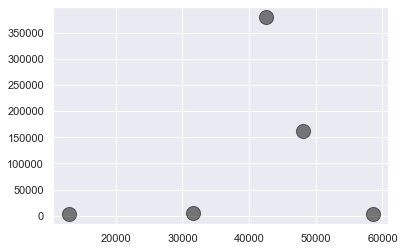

In [35]:
#plt.scatter(macros[:, 0], macros[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);